In [1]:
import sys, imp, os
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import nasdaqdatalink as ndl
import yaml
from tools.instruments import instruments, Quotes
from tools.constants import SRF_CONTINUOUS_BO_DB_PATH
from tools.display import ohlc_chart, view
import backtesting as bt
import re

In [12]:
with open('03.전략연구/systems/system2.yaml', encoding='utf-8') as f:
    system1 = yaml.load(f, Loader=yaml.FullLoader)
    print(system1)

{'name': None, 'description': '시스템 설명', 'quotes_style': 'bo', 'sectors': 'default', 'instruments': None, 'from_date': '2015-01-01', 'to_date': '2016-05-01', 'principal': 1000000, 'heat_system': 'DefaultHeat', 'max_system_heat': 0.4, 'max_sector_heat': 0.4, 'max_trade_heat': 0.1, 'max_lots': 2, 'commission': 2.99, 'skid': 0.25, 'metrics': [['ema200', 'EMA', 'window=200'], ['ema20', 'EMA', 'window=20'], ['volatility', 'ATR', 'window=30'], ['min20', 'MIN', 'window=20'], ['max20', 'MAX', 'window=20']], 'entry_rule': {'long': 'ema200>ema20', 'short': 'ema200<ema20'}, 'exit_rule': {'long': 'ema200<ema20', 'short': 'ema200>ema20'}, 'stop_rule': {'long': 'min20', 'short': 'max20'}}


In [13]:
trader = bt.Trader(quotes_style='bo', systems=[system1])
system = trader.systems[0]

In [14]:
%%time
trader.run()

매매시작
거래일: 2015-01-02 00:00:00, 시스템: None 3.42sec
거래일: 2015-01-05 00:00:00, 시스템: None 0.11sec
거래일: 2015-01-06 00:00:00, 시스템: None 0.10sec
거래일: 2015-01-07 00:00:00, 시스템: None 0.12sec
거래일: 2015-01-08 00:00:00, 시스템: None 0.14sec
거래일: 2015-01-09 00:00:00, 시스템: None 0.15sec
거래일: 2015-01-12 00:00:00, 시스템: None 0.16sec
거래일: 2015-01-13 00:00:00, 시스템: None 0.15sec
거래일: 2015-01-14 00:00:00, 시스템: None 0.15sec
거래일: 2015-01-15 00:00:00, 시스템: None 0.13sec
거래일: 2015-01-16 00:00:00, 시스템: None 0.13sec
거래일: 2015-01-19 00:00:00, 시스템: None 0.13sec
거래일: 2015-01-20 00:00:00, 시스템: None 0.06sec
거래일: 2015-01-21 00:00:00, 시스템: None 0.13sec
거래일: 2015-01-22 00:00:00, 시스템: None 0.13sec
거래일: 2015-01-23 00:00:00, 시스템: None 0.12sec
거래일: 2015-01-26 00:00:00, 시스템: None 0.13sec
거래일: 2015-01-27 00:00:00, 시스템: None 0.14sec
거래일: 2015-01-28 00:00:00, 시스템: None 0.15sec
거래일: 2015-01-29 00:00:00, 시스템: None 0.15sec
거래일: 2015-01-30 00:00:00, 시스템: None 0.15sec
거래일: 2015-02-02 00:00:00, 시스템: None 0.16sec
거래일: 2015-02-03 00:00:00, 시

거래일: 2015-09-22 00:00:00, 시스템: None 0.38sec
거래일: 2015-09-23 00:00:00, 시스템: None 0.40sec
거래일: 2015-09-24 00:00:00, 시스템: None 0.41sec
거래일: 2015-09-25 00:00:00, 시스템: None 0.39sec
거래일: 2015-09-28 00:00:00, 시스템: None 0.40sec
거래일: 2015-09-29 00:00:00, 시스템: None 0.33sec
거래일: 2015-09-30 00:00:00, 시스템: None 0.33sec
거래일: 2015-10-01 00:00:00, 시스템: None 0.34sec
거래일: 2015-10-02 00:00:00, 시스템: None 0.36sec
거래일: 2015-10-05 00:00:00, 시스템: None 0.38sec
거래일: 2015-10-06 00:00:00, 시스템: None 0.41sec
거래일: 2015-10-07 00:00:00, 시스템: None 0.44sec
거래일: 2015-10-08 00:00:00, 시스템: None 0.47sec
거래일: 2015-10-09 00:00:00, 시스템: None 0.49sec
거래일: 2015-10-12 00:00:00, 시스템: None 0.51sec
거래일: 2015-10-13 00:00:00, 시스템: None 0.49sec
거래일: 2015-10-14 00:00:00, 시스템: None 0.51sec
거래일: 2015-10-15 00:00:00, 시스템: None 0.53sec
거래일: 2015-10-16 00:00:00, 시스템: None 0.48sec
거래일: 2015-10-19 00:00:00, 시스템: None 0.45sec
거래일: 2015-10-20 00:00:00, 시스템: None 0.46sec
거래일: 2015-10-21 00:00:00, 시스템: None 0.48sec
거래일: 2015-10-22 00:00:00, 시스템: N

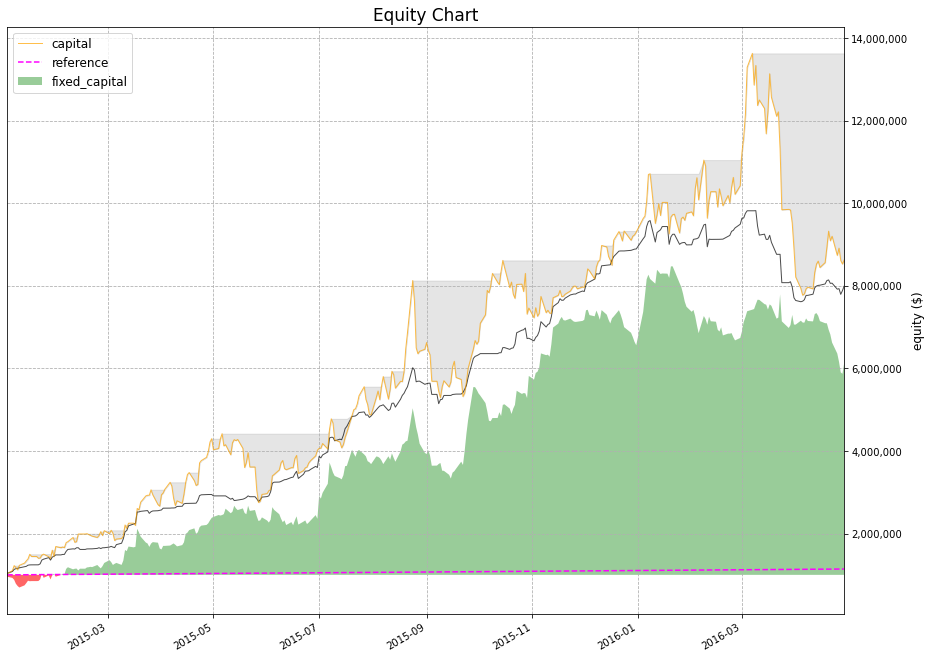

,투자금,최종자산,총손익,Bliss,CAGR,MDD,손익비,승률,위험대비손익,평균손익,평균수익,평균손실,보유기간
Result,"1,000,000","8,629,637",763.0%,0.095,408.0%,43.0%,-1.59,76.4%,25.1%,749,"2,634","-5,346",16 일


In [15]:
system.summary(level=0)

In [6]:
system.summary(level=2)

,총손익,평균손익,표준편차,위험대비손익,승률,보유기간,매매회수
구분,,,,,,,
CBOT 10-year US Treasury Note,416832,227,1107.41,17.28%,60.7%,5.598146,1834
CBOT 2-year US Treasury Note,267267,145,458.89,34.36%,66.8%,5.441304,1840
CBOT 30-year US Treasury Bond,1855970,1013,3422.88,29.71%,65.7%,5.062739,1833
CBOT 5-year US Treasury Note,360836,195,736.48,27.78%,65.9%,5.360541,1850
CBOT Corn,526896,285,1088.00,26.14%,66.0%,5.119524,1849
CBOT Oats,504960,294,1253.71,25.51%,63.7%,5.629738,1715
CBOT Soybean Meal,878650,479,1776.58,28.99%,68.0%,4.817785,1833
CBOT Soybean Oil,593364,321,1359.72,30.15%,63.9%,4.691725,1849
CBOT Soybeans,543264,296,2398.78,19.49%,61.9%,5.310289,1837


In [7]:
system.summary(level=1)

,총손익,평균손익,표준편차,위험대비손익,승률,보유기간,매매회수
구분,,,,,,,
currency,6769356,457,1915.75,28.96%,67.0%,4.840470,14806
equity,10141356,1101,6815.80,24.22%,65.0%,4.759414,9215
fiber,822885,441,2112.59,19.57%,62.9%,6.023032,1867
grain,3314782,304,1696.69,24.43%,63.8%,5.065811,10910
interest-rate,2900905,394,1881.53,27.29%,64.8%,5.365774,7357
meat,1432890,389,2076.07,23.49%,66.2%,4.918024,3684
metal,8077199,877,9036.37,20.33%,61.8%,5.794785,9205
petroleum,7565630,1026,4973.84,29.99%,67.2%,4.580925,7371
tropical,2304828,310,2104.73,17.11%,62.9%,4.996503,7436


In [23]:
t = system.trades.log(symbol='MP')

In [26]:
s = [tr for tr in t if tr['profit']>0]

In [27]:
s

[{'id': 143453,
  'entrydate': Timestamp('2017-04-10 00:00:00'),
  'name': 'CME Mexican Peso',
  'symbol': 'MP',
  'sector': 'currency',
  'position': -1,
  'entryprice': 39817.5,
  'entrylots': 1,
  'entryrisk': 7125000.0,
  'entryrisk_ticks': 1425000,
  'exits': [{'exittype': 'stop',
    'exitdate': Timestamp('2017-04-10 00:00:00'),
    'exitprice': 39960.0,
    'exitlots': 1,
    'profit': 7125000.0,
    'profit_tick': 1425000,
    'duration': 0,
    'result': 'WIN'}],
  'currentprice': 39960.0,
  'stopprice': 39960.0,
  'risk': 0.0,
  'risk_ticks': 0,
  'lots': 0,
  'flame': -0.0,
  'profit': 7125000.0,
  'duration': 0,
  'exittype': 'stop',
  'result': 'WIN',
  'on_fire': False},
 {'id': 143573,
  'entrydate': Timestamp('2017-04-13 00:00:00'),
  'name': 'CME Mexican Peso',
  'symbol': 'MP',
  'sector': 'currency',
  'position': -1,
  'entryprice': 40145.0,
  'entrylots': 1,
  'entryrisk': 7750000.0,
  'entryrisk_ticks': 1550000,
  'exits': [{'exittype': 'stop',
    'exitdate': Tim

In [7]:
equitylog = pd.DataFrame(system.equity.log()).set_index('date')
equity = equitylog.groupby(by='date').last()

<AxesSubplot:xlabel='date'>

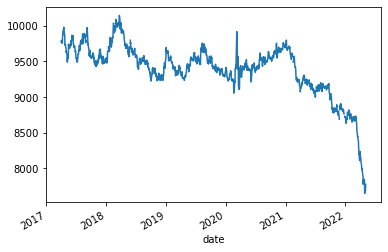

In [35]:
trader.quotes['JY'].loc['2017-04-01':]['close'].plot()

In [34]:
instruments['JY'].tickunit

0.5

In [36]:
trader.quotes['JY'].loc['2017-04-01':]

field,open,high,low,close,volume,oi
date,,,,,,
2017-04-03,9734.0,9779.5,9720.0,9770.0,133438.0,192546.0
2017-04-04,9776.0,9826.0,9775.5,9795.0,140735.0,193092.0
2017-04-05,9789.5,9803.5,9728.0,9773.0,183055.0,192109.0
2017-04-06,9803.5,9823.0,9753.5,9786.0,157580.0,191249.0
2017-04-07,9778.5,9837.5,9736.0,9753.5,244514.0,190922.0
...,...,...,...,...,...,...
2022-04-28,7793.5,7802.0,7628.0,7649.0,237023.0,240924.0
2022-04-29,7652.5,7743.0,7645.5,7735.0,187138.0,248342.0
2022-05-02,7709.5,7725.0,7673.0,7694.0,117115.0,249315.0


In [29]:
b=time()

In [36]:
print(f"{b-a:.2f}")

2.96


In [12]:
system.symbols

['AD', 'CL', 'C', 'LC']

In [14]:
system.signals.loc['2002-01-02':]['LC']

,enter_long,enter_short,exit_long,exit_short,stop_long,stop_short
date,,,,,,
2002-01-02,False,True,True,False,174.454956,178.504974
2002-01-03,False,True,True,False,174.454956,178.654968
2002-01-04,False,True,True,False,174.454956,178.654968
2002-01-07,False,True,True,False,174.454956,178.654968
2002-01-08,False,True,True,False,174.454956,178.654968
...,...,...,...,...,...,...
2022-04-28,True,False,False,True,132.475006,140.000000
2022-04-29,True,False,False,True,132.475006,140.000000
2022-05-02,True,False,False,True,132.475006,140.000000


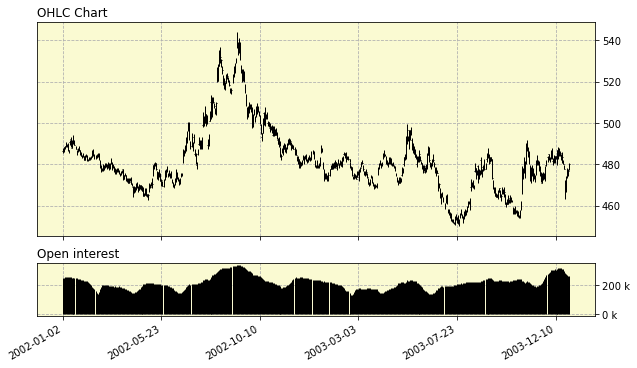

In [16]:
view(quotes)

In [21]:
quotes = trader.loc[start:end].dropna()
        tradelog = self.tradelog[self.tradelog.symbol == symbol]
        #tradelog = tradelog[tradelog.symbol == symbol]
        
        
        if start and end:
            trade = tradelog[ (start <= tradelog.entrydate) & (tradelog.exitdate <= end)]
        else:
            trade = tradelog
        
        cumprofit = trade.profit.cumsum()
        num_trades = len(trade)
        
        fig, (ax) = plt.subplots(2,1, figsize=(15,10),
                                gridspec_kw = {'height_ratios':[3,1]})
        
        #price chart
        ax[0] = ohlc_chart(ax[0], feed, linewidth=0.8)
        for idx, row in trade.iterrows():
            y=feed.loc[row['entrydate']:row['exitdate']]
            colors=['red','red'] if row['position']=='Long' else ['blue','blue']
            ax[0] = ohlc_chart(ax[0], y, colors=colors)
        ax[0].plot(feed[['top','bottom']].shift(1), color='green', linewidth=0.8)
        #tick profit chart
        ax[1].bar(np.arange(1,num_trades+1), np.where(trade.position=='Long', trade.tick, 0), 0.3, color='red', alpha=0.6 )
        ax[1].bar(np.arange(1,num_trades+1), np.where(trade.position=='Short', trade.tick, 0), 0.3, color='blue', alpha=0.6 )
           
        #labels
        name = self.pinfo[symbol]['name']
        ax[0].set_title(name, fontsize=20)
        ax[0].set_ylabel('Price', fontsize=15)
        ax[1].set_ylabel('Profit (tick)', fontsize=15)
       
        #styles
        ax[1].axhline(y=0, linewidth=1, color='darkgrey')
        ax[1].yaxis.tick_right()
        ax[1].set_facecolor('lightgoldenrodyellow')
        ax[1].set_xticks(range(1,num_trades+1))
        ax[1].grid(linestyle='--')

'NYMEX WTI Crude Oil'

In [24]:
table['duration'].mean()

35.285714285714285

In [25]:
df.columns

Index(['id', 'entrydate', 'name', 'symbol', 'sector', 'position', 'entryprice',
       'entrylots', 'entryrisk', 'entryrisk_ticks', 'exits', 'currentprice',
       'stopprice', 'risk', 'risk_ticks', 'lots', 'flame', 'profit',
       'duration', 'exittype', 'result', 'on_fire'],
      dtype='object')

In [6]:
df=pd.DataFrame(system.equity.log())

In [7]:
df2 = df.set_index('date')

In [8]:
df2

,id,principal,capital,security,cash,fixed_capital,profit,risk,system_heat,sector_heat,sector_risk,max_capital,dd,mdd,cagr,commission
date,,,,,,,,,,,,,,,,
2002-01-02,1,100000,100000.0,20900.0,79100.0,95860.0,0.0,4140.0,0.041400,{'petroleum': 0.0414},{'petroleum': 4140.0},100000.0,0.000000,0.000000,0.000000,5.98
2002-01-02,2,100000,100000.0,26730.0,73270.0,95740.0,0.0,4260.0,0.042600,"{'petroleum': 0.0414, 'grain': 0.0012}","{'petroleum': 4140.0, 'grain': 120.0}",100000.0,0.000000,0.000000,0.000000,11.96
2002-01-02,3,100000,100000.0,29810.0,70190.0,93120.0,0.0,6880.0,0.068800,"{'petroleum': 0.0414, 'grain': 0.0012, 'meat':...","{'petroleum': 4140.0, 'grain': 120.0, 'meat': ...",100000.0,0.000000,0.000000,0.000000,17.94
2002-01-02,4,100000,100120.0,23980.0,76140.0,93360.0,120.0,6760.0,0.067519,"{'petroleum': 0.041350379544546546, 'meat': 0....","{'petroleum': 4140.0, 'meat': 2620.0}",100120.0,0.000000,0.000000,0.549198,17.94
2002-01-03,5,100000,100120.0,44880.0,55240.0,88040.0,120.0,12080.0,0.120655,"{'petroleum': 0.09448661606072713, 'meat': 0.0...","{'petroleum': 9460.0, 'meat': 2620.0}",100120.0,0.000000,0.000000,0.244668,23.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-12-24,1255,100000,364.0,0.0,364.0,364.0,-99636.0,0.0,0.000000,{},{},159978.0,99.772469,99.772469,-0.941516,1710.28
2003-12-26,1256,100000,364.0,0.0,364.0,364.0,-99636.0,0.0,0.000000,{},{},159978.0,99.772469,99.772469,-0.941055,1710.28
2003-12-29,1257,100000,364.0,0.0,364.0,364.0,-99636.0,0.0,0.000000,{},{},159978.0,99.772469,99.772469,-0.940363,1710.28


In [7]:
system

<<시스템: tf05>>

In [12]:
p = system.principal

In [10]:
x = equitylog.index.values
capital = equitylog.capital.values
fixed_capital = equitylog.fixed_capital.values
principal = (capital - equitylog.profit).values
max_capital = equitylog.max_capital.values

NameError: name 'FuncFormatter' is not defined

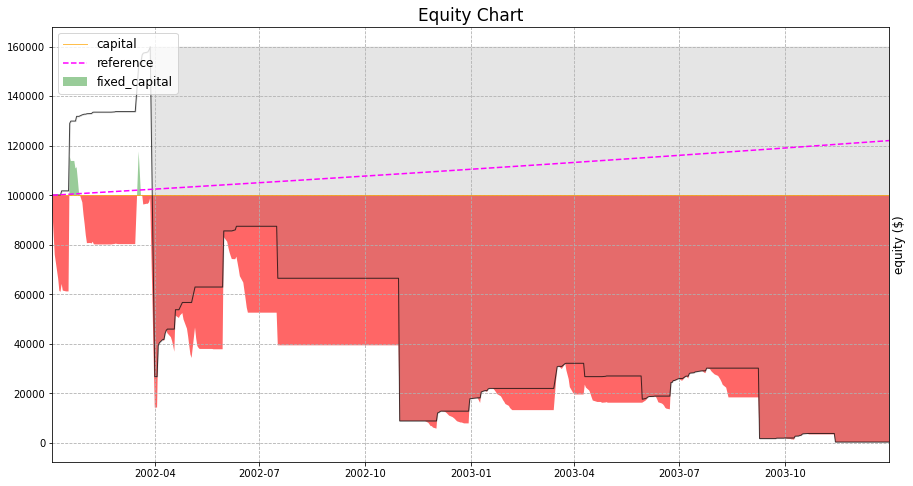

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))
ax.fill_between(x,p,fixed_capital, where=fixed_capital>=p, facecolor='green', alpha=0.4, interpolate=True, label='fixed_capital')
ax.fill_between(x, p, fixed_capital, where=fixed_capital<p, facecolor='red', alpha=0.6, interpolate=True)
ax.fill_between(x, capital, max_capital, color='grey', alpha=0.2)

ax.plot(x, principal, color='orange',alpha=0.7, linewidth=1, label='capital')
ax.plot(x, capital, color='black',alpha=0.7, linewidth=1)

ax.set_xlim([x.min(), x.max()])

#reference curve
rate = 0.1 #annual interest rate
refx = (x-x[0])/np.timedelta64(365,'D')
refy = p*np.exp(rate*refx)
ax.plot(x, refy, color='magenta', linestyle='--', label='reference')

#labels
ax.legend(loc='upper left', fontsize='large')
ax.set_title('Equity Chart', fontsize=17)

#ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('equity ($)', fontsize=12)
ax.yaxis.set_label_position("right")
#style
ax.grid(linestyle='--')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.tick_right()
fig.autofmt_xdate()
        
plt.show() 


In [11]:
class test:
    def __repr__(self):
        a={'a':1,'b':'sdf'}
        return f'{a}'

In [12]:
a=test()

In [13]:
b=[]

In [14]:
b.append(a)

In [17]:
b[0].name

11

In [16]:
a.name = 11

In [ ]:
trades = system.trades.book.statements

In [ ]:
trades = [trade for trade in trades if trade['result'] != 'REJECT']

In [ ]:
quote = trader.quotes['AD'].loc[today]

In [ ]:
quote

In [ ]:
trader.run()

In [ ]:
system.trades.book.statements

In [ ]:
price = quote['open']+round(diff*0.25)*instruments['AD'].tickunit

In [ ]:
round(price, 5)

In [ ]:
a={'b', 'c'}

In [ ]:
a['b'] = 1

In [ ]:
b['b'] = 'fffdd'

In [ ]:
a

In [ ]:
b

In [ ]:
c

In [ ]:
c.append(5)

In [ ]:
instruments.get_symbols('srf')

In [ ]:
type(trader.quotes)

In [ ]:
system.metrics.attrs['type']